**Noms integrants del grup amb corresponents NIUs:**

Adriana Avilés (1676127),

Anna Garcia (1665817),

David Morillo (1666540),

Paula Franco (1674234)

# **Processament mofrològic III**



In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [57]:
def display_gray_256(img): 
    plt.axis('off')
    plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255)

In [58]:
# Kernel = Element estructurant (equivalent al filtre, finestra lliscant)
kernel = np.ones((3, 3), np.uint8)

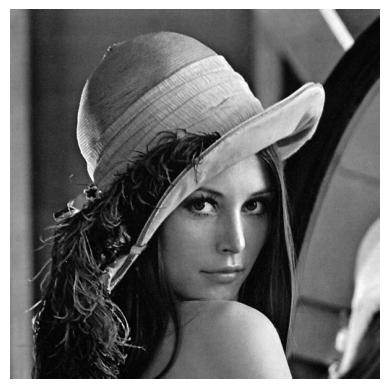

In [59]:
# Carregar la imatge
original_image = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

if original_image is None:
    raise FileNotFoundError("Could not read 'lena.jpg'. Please check the file path or file integrity.")

display_gray_256(original_image)

### **Exercici 1**
Implementeu la funció erode_img equivalent a la funció erode de cv2 que faci la operació d'erosió per a una imatge en escala de grisos. 
Comprova amb el codi ja donat que els resultats de la vostra funció i la de cv2 generen una imatge equivalent.

In [60]:
def erode_img(image, kernel, iterations=1):
    # Implementeu la vostra funció aquí
    output_image = np.zeros_like(image)
    
    for i in range(iterations):
        for x in range(1, image.shape[0] - 1):
            for y in range(1, image.shape[1] - 1):
                output_image[x, y] = np.min(image[x-1:x+2, y-1:y+2] * kernel)
        image = output_image.copy()
    
    return output_image

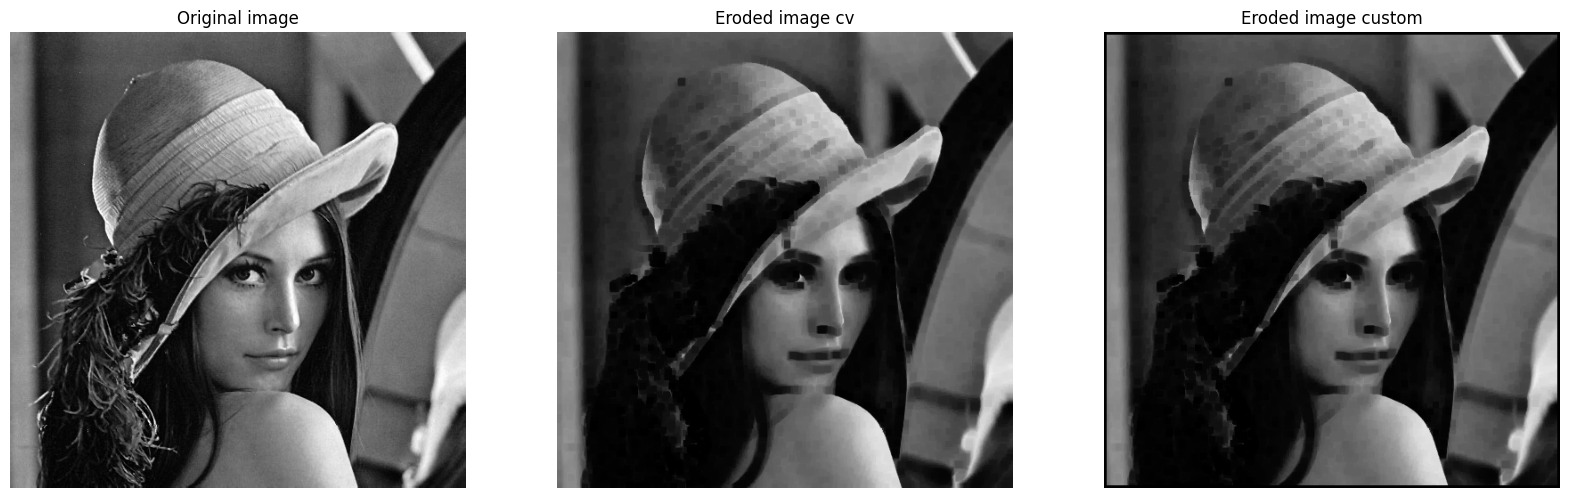

In [61]:
# Comparació entre la funció de OpenCV i la vostra implementació
eroded_image_cv = cv2.erode(original_image, kernel, iterations=3)
eroded_image_custom = erode_img(original_image, kernel, iterations=3)

plt.figure(figsize = (20, 20))
plt.subplot(1,3,1)
plt.title("Original image")
display_gray_256(original_image)

plt.subplot(1,3,2)
plt.title("Eroded image cv")
display_gray_256(eroded_image_cv)

plt.subplot(1,3,3)
plt.title("Eroded image custom")
display_gray_256(eroded_image_custom)

### **Exercici 2**
Implementeu la funció dilate_img equivalent a la funció dilate de cv2 que faci la operació de dilatació per a una imatge en escala de grisos. 
Comprova amb el codi ja donat que els resultats de la vostra funció i la de cv2 generen una imatge equivalent.

In [62]:
def dilate_img(image, kernel, iterations=1):
    # Implementeu la vostra funció aquí
    output_image = np.zeros_like(image)
    
    for i in range(iterations):
        for x in range(1, image.shape[0] - 1):
            for y in range(1, image.shape[1] - 1):
                output_image[x, y] = np.max(image[x-1:x+2, y-1:y+2] * kernel)
        image = output_image.copy()
    
    return output_image

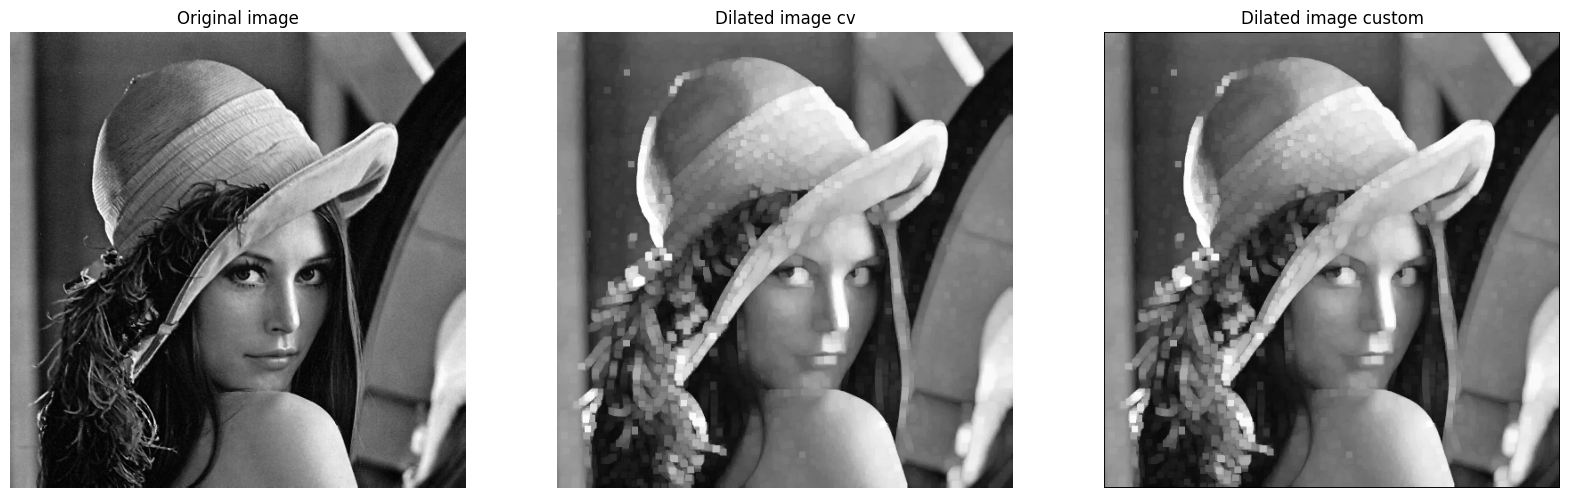

In [63]:
# Comparació entre la funció de OpenCV i la vostra implementació
dilated_image_cv = cv2.dilate(original_image, kernel, iterations=3)
dilated_image_custom = dilate_img(original_image, kernel, iterations=3)

plt.figure(figsize = (20, 20))
plt.subplot(1,3,1)
plt.title("Original image")
display_gray_256(original_image)

plt.subplot(1,3,2)
plt.title("Dilated image cv")
display_gray_256(dilated_image_cv)

plt.subplot(1,3,3)
plt.title("Dilated image custom")
display_gray_256(dilated_image_custom)

### Exercici 3
Implementeu la funció tophat_img per tal que realitzi un filtrat morfològic de tipus top-hat a la imatge en escala de grisos, és a dir que es quedi amb els màxims.
Utilitzeu la funció open_img ja implementada que elimina aquests màxims.

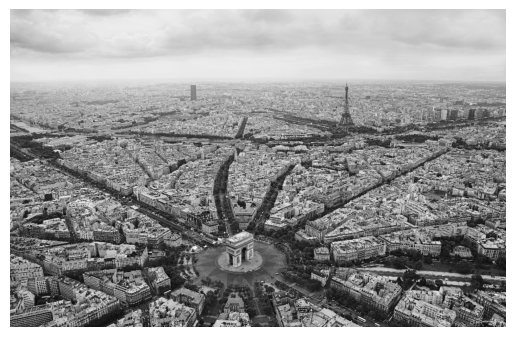

In [64]:
# Carregar imatge
original_image = cv2.imread('city.jpg', cv2.IMREAD_GRAYSCALE)

if original_image is None:
    raise FileNotFoundError("Could not read 'city.jpg'. Please check the file path or file integrity.")

display_gray_256(original_image)

In [65]:
def open_img(image, kernel):
    eroded_image = erode_img(image, kernel)
    opened_image = dilate_img(eroded_image, kernel)
    return opened_image

def tophat_img(image, kernel):
    # Implementeu la vostra funció aquí
    tophat_image = image - open_img(image, kernel)
    return tophat_image

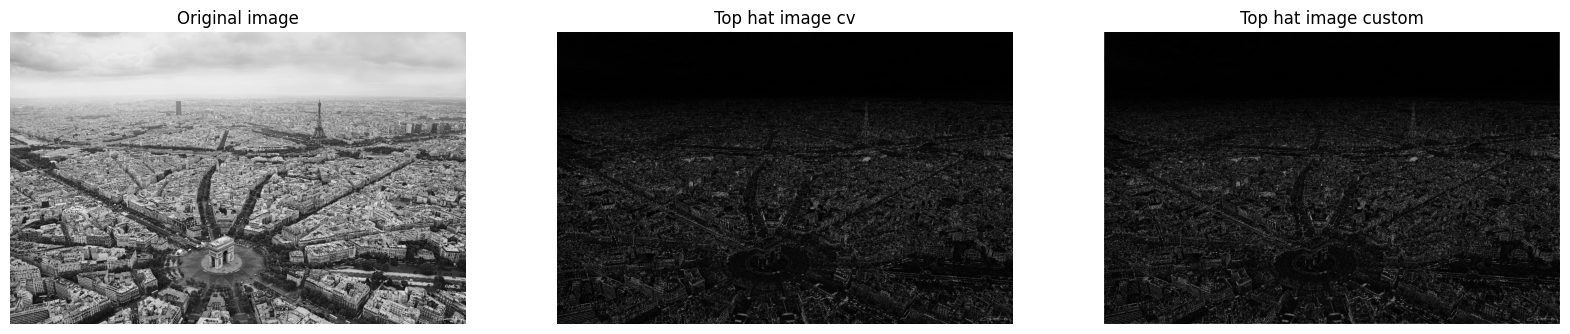

In [66]:
# Comparació entre la funció de OpenCV i la vostra implementació
tophat_image_cv = cv2.morphologyEx(original_image, cv2.MORPH_TOPHAT, kernel)
tophat_image_custom = tophat_img(original_image, kernel)

plt.figure(figsize = (20, 20))
plt.subplot(1,3,1)
plt.title("Original image")
display_gray_256(original_image)

plt.subplot(1,3,2)
plt.title("Top hat image cv")
display_gray_256(tophat_image_cv)

plt.subplot(1,3,3)
plt.title("Top hat image custom")
display_gray_256(tophat_image_custom)